In [7]:
#import the libraries

from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta, date
import re
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
#jtplot.style()

In [8]:
#Get the webpage and parse it as html

page = requests.get("https://www.imdb.com/search/title/?genres=sci_fi&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=5aab685f-35eb-40f3-95f7-c53f09d542c3&pf_rd_r=E40TDJEMENX3WJ81KT4Q&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_17")
soup = BeautifulSoup(page.content, 'html.parser')
#print(soup)

In [9]:
#Get the movie names#

all_movies = soup.find_all('div', class_= 'lister-item mode-advanced')
fifty_movies = all_movies[0:50]

movie_names = []
for each_movie in fifty_movies:
    movie_name = each_movie.h3.a.text
    movie_names.append(movie_name)
    
print(movie_names)

['Inception', 'Matrix', 'Das Imperium schlägt zurück', 'Interstellar', 'Krieg der Sterne', 'Prestige: Die Meister der Magie', 'Terminator 2: Tag der Abrechnung', 'Zurück in die Zukunft', 'Spider-Man: A New Universe', 'Avengers: Endgame', 'Avengers: Infinity War', 'WALL·E: Der Letzte räumt die Erde auf', 'Alien - Das unheimliche Wesen aus einer fremden Welt', 'Vergiss mein nicht', 'Aliens - Die Rückkehr', 'Die Rückkehr der Jedi-Ritter', 'Uhrwerk Orange', '2001: Odyssee im Weltraum', 'Metropolis', 'Zack Snyder: Justice League', 'V wie Vendetta', 'Stalker', 'Logan: The Wolverine', 'PK - Andere Sterne, Andere Sitten', 'Mad Max: Fury Road', 'Neon Genesis Evangelion - The End of Evangelion', 'Jurassic Park', 'Nausicaä - Prinzessin aus dem Tal der Winde', 'Das Ding aus einer anderen Welt', 'Der Blade Runner', 'Solaris', 'Der Marsianer: Rettet Mark Watney', 'Guardians of the Galaxy', 'Blade Runner 2049', 'Her', 'Deadpool', 'The Avengers', 'G.O.R.A.', 'Donnie Darko', 'Der Gigant aus dem All', '

In [10]:
#Get the rating

movie_rating = soup.find_all('div', class_ = 'inline-block ratings-imdb-rating')
movie_rating_list = []
for each_movie in movie_rating:
    e = each_movie.text
    movie_rating_list.append(e)

movie_rating_string = ' '.join(movie_rating_list)  
movie_rating = re.findall("[\d][.][\d]", movie_rating_string)
movie_rating = movie_rating[0:50]
print(movie_rating)

['8.8', '8.7', '8.7', '8.6', '8.6', '8.5', '8.5', '8.5', '8.4', '8.4', '8.4', '8.4', '8.4', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.2', '8.2', '8.2', '8.1', '8.1', '8.1', '8.1', '8.1', '8.1', '8.1', '8.1', '8.1', '8.0', '8.0', '8.0', '8.0', '8.0', '8.0', '8.0', '8.0', '8.0', '8.0', '8.0', '8.0', '8.0', '8.0', '8.0', '7.9', '7.9', '7.9', '7.9']


In [11]:
#Get the movie year

year = soup.find_all('span', class_= 'lister-item-year text-muted unbold')

movies_year_list = []
for each_movie in year:
    e = each_movie.text
    movies_year_list.append(e)

movie_year_string = ' '.join(movies_year_list)  
movie_year = re.findall("[0-9]+", movie_year_string)
print(movie_year)                                    #cleaned movie year

['2010', '1999', '1980', '2014', '1977', '2006', '1991', '1985', '2018', '2019', '2018', '2008', '1979', '2004', '1986', '1983', '1971', '1968', '1927', '2021', '2005', '1979', '2017', '2014', '2015', '1997', '1993', '1984', '1982', '1982', '1972', '2015', '2014', '2017', '2013', '2016', '2012', '2004', '2001', '1999', '1995', '1995', '1988', '1986', '1984', '1968', '2018', '2017', '2016', '2015']


In [12]:
#Get the duration

runtime = soup.find_all('span', class_ = 'runtime')

movies_runtime_list = []
for each_movie in runtime:
    e = each_movie.text
    movies_runtime_list.append(e)

movie_runtime_string = ' '.join(movies_runtime_list)   
movie_runtime = re.findall("[0-9]+", movie_runtime_string)
print(movie_runtime)                                        #cleaned movie runtime


['148', '136', '124', '169', '121', '130', '137', '116', '117', '181', '149', '98', '117', '108', '137', '131', '136', '149', '153', '242', '132', '162', '137', '153', '120', '87', '127', '117', '109', '117', '167', '144', '121', '164', '126', '108', '143', '127', '113', '86', '129', '83', '124', '125', '107', '112', '101', '130', '116', '138']


In [13]:
#Get the actors and directors
act_direc = soup.find_all('div',class_="lister-item-content")

#Actors
list_of_directors = []
list_of_actors = []
for i in range(0,50):                        #as there are 50 movies per page, loop over them
    names = act_direc[i].find_all('p')[2].text
    names = names.split(":")
    list_of_actors.append(names[ len(names) -1 ])      
list(map(lambda x:x.strip(),list_of_actors))
list_of_actors = [x.replace('\n', '') for x in list_of_actors]

#Directors
for i in range(0,50):                        
    names = act_direc[i].find_all('p')[2].text
    names = names.split(":")
    list_of_directors.append(names[1]) 

list_of_directors = [x.replace('\n', '').replace('|', '').replace('Stars','').replace(' ','') for x in list_of_directors]  
print(list_of_directors)
#print(list_of_actors)

['ChristopherNolan', 'LanaWachowski,LillyWachowski', 'IrvinKershner', 'ChristopherNolan', 'GeorgeLucas', 'ChristopherNolan', 'JamesCameron', 'RobertZemeckis', 'BobPersichetti,PeterRamsey,RodneyRothman', 'AnthonyRusso,JoeRusso', 'AnthonyRusso,JoeRusso', 'AndrewStanton', 'RidleyScott', 'MichelGondry', 'JamesCameron', 'RichardMarquand', 'StanleyKubrick', 'StanleyKubrick', 'FritzLang', 'ZackSnyder', 'JamesMcTeigue', 'AndreiTarkovsky', 'JamesMangold', 'RajkumarHirani', 'GeorgeMiller', 'HideakiAnno,KazuyaTsurumaki', 'StevenSpielberg', 'HayaoMiyazaki', 'JohnCarpenter', 'RidleyScott', 'AndreiTarkovsky', 'RidleyScott', 'JamesGunn', 'DenisVilleneuve', 'SpikeJonze', 'TimMiller', 'JossWhedon', 'ÖmerFarukSorak', 'RichardKelly', 'BradBird', 'TerryGilliam', 'MamoruOshii', 'KatsuhiroÔtomo', 'HayaoMiyazaki', 'JamesCameron', 'FranklinJ.Schaffner', 'WesAnderson', 'TaikaWaititi', 'DenisVilleneuve', 'J.J.Abrams']


In [14]:
#Get the votes
Total_votes = soup.find_all('p',class_="sort-num_votes-visible")
votes_gross =[]
for i in Total_votes:
    votes_gross.append(i.text)
    list(map(lambda x:x.strip(),votes_gross))
    votes_gross = [x.replace('\n', '').replace('|','').replace('Votes:','').replace('Gross:','') for x in votes_gross]  

#Separate votes and gross into separate lists(if somevalues are missing, replace it with Zero)
votes = []
gross = []

for i in range(0,50):
    splt = votes_gross[i].split()
    if len(splt) == 2:
        gross.append(splt[1])
    else:
        gross.append('nan') 
    votes.append(splt[0]) 
    
print(gross)
print(votes)

['$292.58M', '$171.48M', '$290.48M', '$188.02M', '$322.74M', '$53.09M', '$204.84M', '$210.61M', '$190.24M', '$858.37M', '$678.82M', '$223.81M', '$78.90M', '$34.40M', '$85.16M', '$309.13M', '$6.21M', '$56.95M', '$1.24M', 'nan', '$70.51M', '$0.23M', '$226.28M', '$10.62M', '$154.06M', 'nan', '$402.45M', '$0.50M', '$13.78M', '$32.87M', 'nan', '$228.43M', '$333.18M', '$92.05M', '$25.57M', '$363.07M', '$623.28M', 'nan', '$1.48M', '$23.16M', '$57.14M', '$0.52M', '$0.55M', 'nan', '$38.40M', '$33.40M', '$32.02M', '$315.06M', '$100.55M', '$936.66M']
['2,092,467', '1,695,006', '1,170,074', '1,536,883', '1,242,110', '1,204,031', '1,003,712', '1,070,654', '388,573', '845,916', '858,144', '1,010,276', '795,987', '919,995', '658,168', '958,952', '764,513', '609,581', '161,522', '227,253', '1,041,182', '118,847', '657,333', '164,862', '892,656', '40,386', '876,594', '153,166', '375,062', '700,055', '82,109', '768,454', '1,054,400', '470,953', '547,579', '912,881', '1,272,277', '57,662', '745,315', '17

In [15]:
# Getting metascore
score = soup.find_all('div',class_="ratings-bar")
metascore = []
for i in range(0,50):
    meta = score[i].find_all('div', class_ = "inline-block ratings-metascore")
    try:
        m = meta[0].find('span').text
        metascore.append(m)
    except:
        metascore.append("nan")
        
score = str.maketrans('', '', ' ')
score_list = [s.translate(score) for s in metascore]
score_list
#   The str.maketrans() static method is a helpful tool to produce the translation map; 
#   the first two arguments are empty strings because you are not replacing characters, only removing. 
#  The third string holds all characters you want to remove.

['74',
 '73',
 '82',
 '74',
 '90',
 '66',
 '75',
 '87',
 '87',
 '78',
 '68',
 '95',
 '89',
 '89',
 '84',
 '58',
 '77',
 '84',
 '98',
 '54',
 '62',
 'nan',
 '77',
 'nan',
 '90',
 'nan',
 '68',
 '86',
 '57',
 '84',
 '90',
 '80',
 '76',
 '81',
 '90',
 '65',
 '69',
 'nan',
 '88',
 '85',
 '74',
 '76',
 'nan',
 '78',
 '84',
 '79',
 '82',
 '74',
 '81',
 '80']

In [16]:
#create the dataframe

df = pd.DataFrame({'Movie':movie_names, 'Rating':movie_rating, 'Year':movie_year,'Runtime':movie_runtime,
                   'Metascore':score_list,'Votes':votes, 'Gross':gross, 'Director':list_of_directors, 'Stars':list_of_actors})

#df = pd.read_csv("IMDB_webscrapping.csv")
#df["Movie"] = movie_names
df.to_csv("IMDB_webscrapping.csv", index=False)
df

#df.to_csv('Movies50_100.csv', index=False) #write the df to a csv file

,Movie,Rating,Year,Runtime,Metascore,Votes,Gross,Director,Stars
0,Inception,8.8,2010,148,74,"2,092,467",$292.58M,ChristopherNolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio..."
1,Matrix,8.7,1999,136,73,"1,695,006",$171.48M,"LanaWachowski,LillyWachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ..."
2,Das Imperium schlägt zurück,8.7,1980,124,82,"1,170,074",$290.48M,IrvinKershner,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil..."
3,Interstellar,8.6,2014,169,74,"1,536,883",$188.02M,ChristopherNolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch..."
4,Krieg der Sterne,8.6,1977,121,90,"1,242,110",$322.74M,GeorgeLucas,"Mark Hamill, Harrison Ford, Carrie Fisher, Ale..."
5,Prestige: Die Meister der Magie,8.5,2006,130,66,"1,204,031",$53.09M,ChristopherNolan,"Christian Bale, Hugh Jackman, Scarlett Johanss..."
6,Terminator 2: Tag der Abrechnung,8.5,1991,137,75,"1,003,712",$204.84M,JamesCameron,"Arnold Schwarzenegger, Linda Hamilton, Edward ..."
7,Zurück in die Zukunft,8.5,1985,116,87,"1,070,654",$210.61M,RobertZemeckis,"Michael J. Fox, Christopher Lloyd, Lea Thompso..."
8,Spider-Man: A New Universe,8.4,2018,117,87,"388,573",$190.24M,"BobPersichetti,PeterRamsey,RodneyRothman","Shameik Moore, Jake Johnson, Hailee Steinfeld,..."
9,Avengers: Endgame,8.4,2019,181,78,"845,916",$858.37M,"AnthonyRusso,JoeRusso","Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."


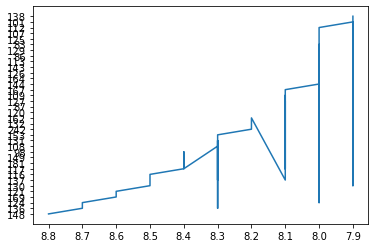

In [23]:
#Plots

plt.plot(movie_rating, movie_runtime)

